In [1]:
# import libraries
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from matplotlib import pyplot as plt

In [2]:
# Load Dataset
old_df=pd.read_csv(r"/Users/mohammadehsan/Desktop/autos.csv",encoding="latin1")
old_df
old_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [3]:
# Extraction new_data of old_data
new_data=old_df[["price","abtest","vehicleType","yearOfRegistration","gearbox","powerPS","model","fuelType","brand","notRepairedDamage","odometer"]]
new_data
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   price               50000 non-null  object
 1   abtest              50000 non-null  object
 2   vehicleType         44905 non-null  object
 3   yearOfRegistration  50000 non-null  int64 
 4   gearbox             47320 non-null  object
 5   powerPS             50000 non-null  int64 
 6   model               47242 non-null  object
 7   fuelType            45518 non-null  object
 8   brand               50000 non-null  object
 9   notRepairedDamage   40171 non-null  object
 10  odometer            50000 non-null  object
dtypes: int64(2), object(9)
memory usage: 4.2+ MB


In [4]:
new_data.shape
new_data.head(5)

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,fuelType,brand,notRepairedDamage,odometer
0,"$5,000",control,bus,2004,manuell,158,andere,lpg,peugeot,nein,"150,000km"
1,"$8,500",control,limousine,1997,automatik,286,7er,benzin,bmw,nein,"150,000km"
2,"$8,990",test,limousine,2009,manuell,102,golf,benzin,volkswagen,nein,"70,000km"
3,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,benzin,smart,nein,"70,000km"
4,"$1,350",test,kombi,2003,manuell,0,focus,benzin,ford,nein,"150,000km"


In [5]:
# Cleaning Data
new_data["notRepairedDamage"]=new_data["notRepairedDamage"].replace({"nein":"no","ja":"yes"}).copy()
new_data

/var/folders/1q/2_r5ckf54s3fskzjg6wx91fc0000gn/T/ipykernel_1532/2913922124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["notRepairedDamage"]=new_data["notRepairedDamage"].replace({"nein":"no","ja":"yes"}).copy()


,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,fuelType,brand,notRepairedDamage,odometer
0,"$5,000",control,bus,2004,manuell,158,andere,lpg,peugeot,no,"150,000km"
1,"$8,500",control,limousine,1997,automatik,286,7er,benzin,bmw,no,"150,000km"
2,"$8,990",test,limousine,2009,manuell,102,golf,benzin,volkswagen,no,"70,000km"
3,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,benzin,smart,no,"70,000km"
4,"$1,350",test,kombi,2003,manuell,0,focus,benzin,ford,no,"150,000km"
...,...,...,...,...,...,...,...,...,...,...,...
49995,"$24,900",control,limousine,2011,automatik,239,q5,diesel,audi,no,"100,000km"
49996,"$1,980",control,cabrio,1996,manuell,75,astra,benzin,opel,no,"150,000km"
49997,"$13,200",test,cabrio,2014,automatik,69,500,benzin,fiat,no,"5,000km"
49998,"$22,900",control,kombi,2013,manuell,150,a3,diesel,audi,no,"40,000km"


In [6]:
# new_data=new_data[(new_data["price"]<=100) & (new_data["price"]>=350000)]
new_data["price"]=new_data["price"].astype(str)
new_data["price"] = new_data["price"].replace(r"[^0-9]", "", regex=True)
new_data = new_data[new_data["price"].str.len() > 0]
new_data["price"] = new_data["price"].astype(int)
new_data = new_data[(new_data["price"] > 100) & (new_data["price"] < 100000)]
new_data

/var/folders/1q/2_r5ckf54s3fskzjg6wx91fc0000gn/T/ipykernel_1532/771313322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["price"]=new_data["price"].astype(str)
/var/folders/1q/2_r5ckf54s3fskzjg6wx91fc0000gn/T/ipykernel_1532/771313322.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["price"] = new_data["price"].replace(r"[^0-9]", "", regex=True)


,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,fuelType,brand,notRepairedDamage,odometer
0,5000,control,bus,2004,manuell,158,andere,lpg,peugeot,no,"150,000km"
1,8500,control,limousine,1997,automatik,286,7er,benzin,bmw,no,"150,000km"
2,8990,test,limousine,2009,manuell,102,golf,benzin,volkswagen,no,"70,000km"
3,4350,control,kleinwagen,2007,automatik,71,fortwo,benzin,smart,no,"70,000km"
4,1350,test,kombi,2003,manuell,0,focus,benzin,ford,no,"150,000km"
...,...,...,...,...,...,...,...,...,...,...,...
49995,24900,control,limousine,2011,automatik,239,q5,diesel,audi,no,"100,000km"
49996,1980,control,cabrio,1996,manuell,75,astra,benzin,opel,no,"150,000km"
49997,13200,test,cabrio,2014,automatik,69,500,benzin,fiat,no,"5,000km"
49998,22900,control,kombi,2013,manuell,150,a3,diesel,audi,no,"40,000km"


In [7]:
new_data["odometer"].describe
new_data["odometer"]=new_data["odometer"].astype(str)
new_data["odometer"]=new_data["odometer"].str.replace(r"[^0-9]","",regex=True)
new_data["odometer"]=new_data["odometer"].astype(int)
new_data = new_data[new_data["odometer"] <= 1000000]
print(new_data["odometer"].head())

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer, dtype: int64


In [8]:
# Processing 
categorical_columns=[
    "brand",
    "gearbox",
    "vehicleType",
    "fuelType",
    "model",
    "notRepairedDamage",
    "abtest",
    
]
label=LabelEncoder()
for col in categorical_columns:
    new_data[col]=label.fit_transform(new_data[col].astype(str))
print(new_data.head())

   price  abtest  vehicleType  yearOfRegistration  gearbox  powerPS  model  \
0   5000       0            1                2004        1      158     40   
1   8500       0            6                1997        0      286     19   
2   8990       1            6                2009        1      102    116   
3   4350       0            4                2007        0       71    106   
4   1350       1            5                2003        1        0    103   

   fuelType  brand  notRepairedDamage  odometer  
0         6     25                  1    150000  
1         1      2                  1    150000  
2         1     38                  1     70000  
3         1     32                  1     70000  
4         1     10                  1    150000  


In [9]:
new_data.describe()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,fuelType,brand,notRepairedDamage,odometer
count,48051.000000,48051.000000,48051.000000,48051.000000,48051.000000,48051.000000,48051.000000,48051.000000,48051.000000,48051.000000,48051.000000
mean,5811.984475,0.514766,4.685522,2004.749433,0.835716,117.585107,102.463050,2.149986,20.654908,0.911781,125989.261410
std,7529.996046,0.499787,1.847680,88.052996,0.477183,200.601635,69.667732,1.763074,13.335623,0.520646,39443.053026
min,110.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.000000
25%,1250.000000,0.000000,4.000000,1999.000000,1.000000,74.000000,40.000000,1.000000,9.000000,1.000000,125000.000000
50%,3010.000000,1.000000,5.000000,2004.000000,1.000000,108.000000,102.000000,1.000000,23.000000,1.000000,150000.000000
75%,7499.000000,1.000000,6.000000,2008.000000,1.000000,150.000000,158.000000,3.000000,33.000000,1.000000,150000.000000
max,99900.000000,1.000000,8.000000,9999.000000,2.000000,17700.000000,245.000000,7.000000,39.000000,2.000000,150000.000000


In [10]:
# Modeling 
X=new_data.drop("price",axis=1)
y=new_data["price"]

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape[0])
print(y_train.shape[0])

38440
38440


In [12]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
y_pred=model.predict(X_test)
mse=(mean_squared_error(y_pred,y_test))
rmse=np.sqrt(mse)
r2=r2_score(y_pred,y_test)
print(f"mse_metrics is :{mse}")
print(f"rmse_metrics is:{rmse}")
print(f"r2_score is:{r2}")

mse_metrics is :36462575.018855
rmse_metrics is:6038.424878960986
r2_score is:-1.0904235397452489


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MSE: 8887158.667017398
RMSE: 2981.1337888490343
R² Score: 0.8308800013297845


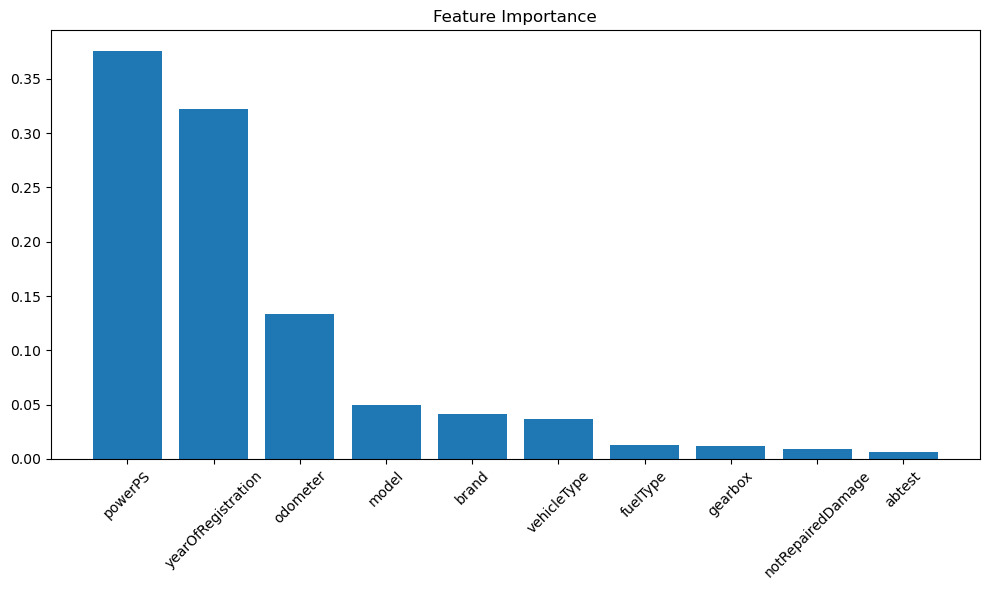

In [16]:
# Feature Importance

importances=rf.feature_importances_
features=X.columns
indices=importances.argsort()[::-1]
plt.figure(figsize=(10,6))
plt.bar(range(len(importances)),importances[indices],align="center")
plt.xticks(range(len(importances)),[features[i] for i in indices],rotation=45)
plt.title("Feature Importance")
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()



## 📊 Feature Importance Analysis  

From the feature importance chart, we can see:  

1. **Year of Registration** → One of the most influential factors.  
   - Newer cars usually have a higher price, while older cars lose value over time (depreciation).  

2. **Odometer (mileage)** → Strong negative impact.  
   - Cars with higher mileage typically have lower prices, since they are considered more “used” and less reliable.  

3. **Brand** → Very important.  
   - Premium brands (e.g., BMW, Audi, Mercedes) generally have higher resale values compared to economy brands.  

4. **Fuel Type & Gearbox** → Moderate effect.  
   - Diesel cars or automatic transmissions might increase the price, depending on demand in the market.  

5. **Vehicle Type** → Smaller, but still relevant.  
   - SUVs and limousines often have higher prices compared to compact cars.  

6. **Not Repaired Damage** → Noticeable factor.  
   - Cars with unrepaired damage are significantly cheaper.  

---

✅ This analysis shows that the model is learning realistic market patterns, which explains why **RandomForest** performs much better than **Linear Regression** for this dataset.


## 📌 Conclusion

As you can see, the accuracy of the **Linear Regression model** in terms of the metrics **R²** and **MSE** is very low and practically meaningless.  
In fact, the R² score is almost **-1**, which indicates a poor fit.  

However, the performance of the models using **Random Forest** and **Decision Tree** is significantly better and much more acceptable, delivering reasonable accuracy for this dataset.  
